 # <center> Gráficos para presentación </center>

 Con los datos que obtuvimos del modelo de AI y de la creacion de nuestro trining set, generamos diversos gráficos

In [1]:
# Importa todas las librerías necesarias
import os
import warnings
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

from shapely.geometry import Point, polygon
from shapely.ops import cascaded_union

warnings.filterwarnings("ignore") # Ignora los warnings

In [5]:
#importa de consolidados los datos de interes

data = pd.read_csv('../Consolidados/training_set.csv')

In [6]:
# código para asignar los estados a su respectivo id
def state_name(code):
    for key, value in state_codes.items():
        if value == code:
            return key
        
state_codes = {
    'Aguascalientes': 1,
    'Baja California': 2,
    'Baja California Sur': 3,
    'Campeche': 4,
    'Coahuila de Zaragoza': 5,
    'Colima': 6,
    'Chiapas': 7,
    'Chihuahua': 8,
    'Ciudad de México': 9,
    'Durango': 10,
    'Guanajuato': 11,
    'Guerrero': 12,
    'Hidalgo': 13,
    'Jalisco': 14,
    'México': 15,
    'Michoacán de Ocampo': 16,
    'Morelos': 17,
    'Nayarit': 18,
    'Nuevo León': 19,
    'Oaxaca': 20,
    'Puebla': 21,
    'Querétaro': 22,
    'Quintana Roo': 23,
    'San Luis Potosí': 24,
    'Sinaloa': 25,
    'Sonora': 26,
    'Tabasco': 27,
    'Tamaulipas': 28,
    'Tlaxcala': 29,
    'Veracruz de Ignacio de la Llave': 30,
    'Yucatán': 31,
    'Zacatecas': 32
}

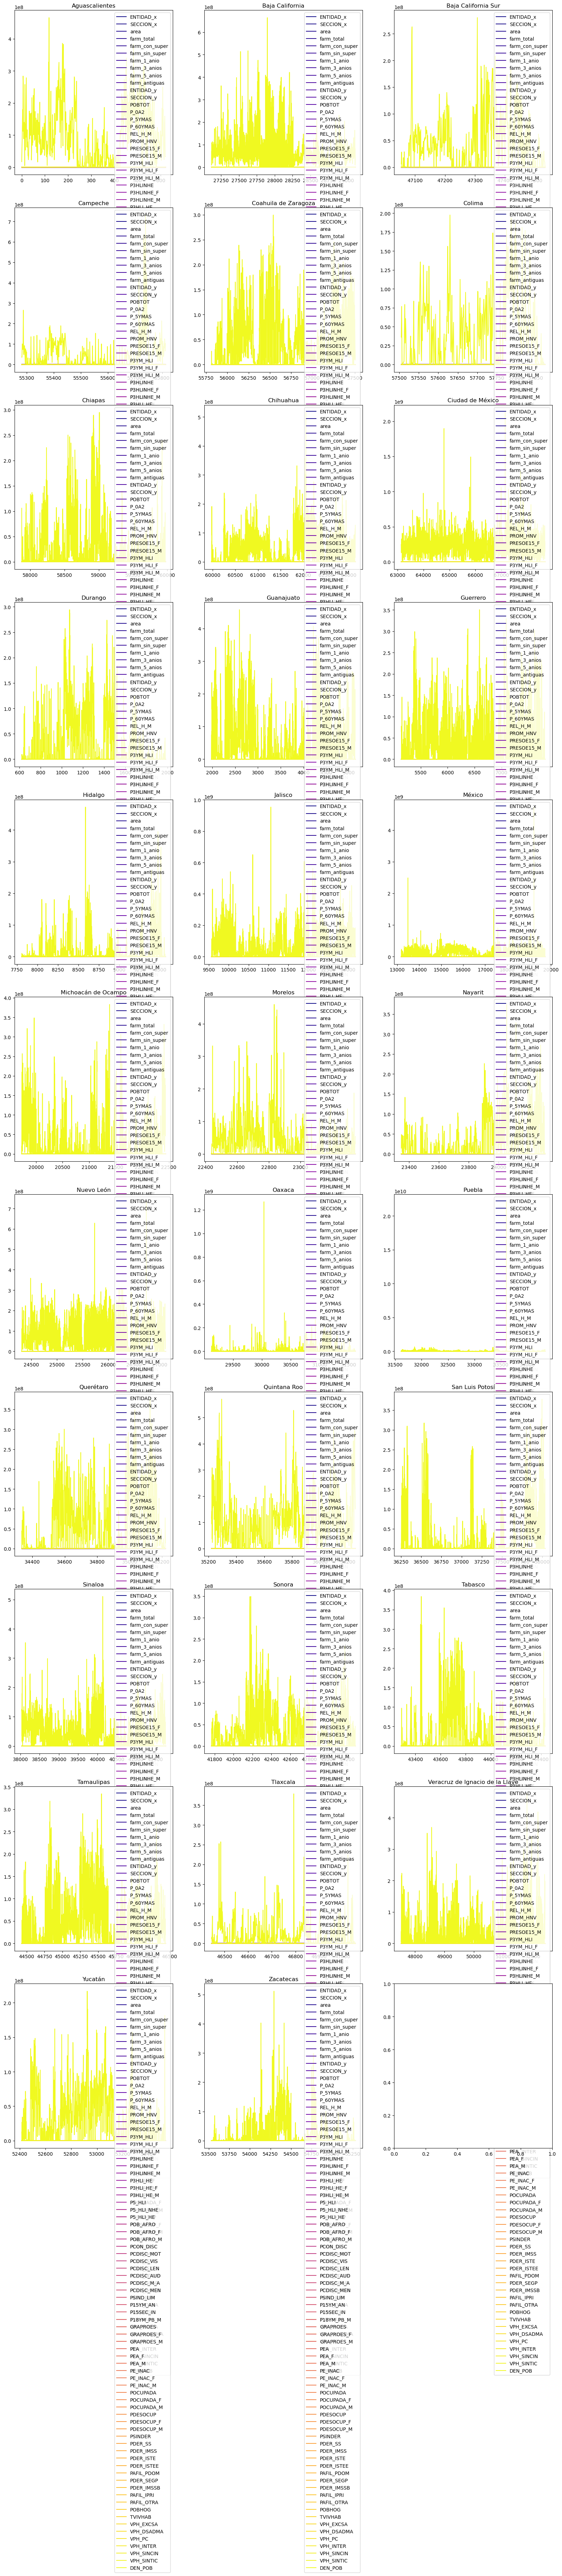

In [7]:
# Grafica la densidad poblacional por sección electoral

data['DEN_POB'] = data['POBTOT'] / data['area']

fig, axes = plt.subplots(11, 3, figsize=(20, 80))

for ent, ax in zip(range(1, 33), axes.flatten()):
    data[(data.ENTIDAD_x == ent)].plot(ax=ax, column='DEN_POB', cmap='plasma', legend=True)
    ax.set_title(f'{state_name(ent)}')

plt.show()

In [ ]:
#bajo de consolidados cuales fuero las predicciones para graficarlas

#### Falta hacerlo funcionar (que sea independiente del script de consolidados)

data_with_pred = pd.read_csv('../Consolidados/training_set_pred.csv')
merged_data['pred'] = data_with_pred['dif_farm_grap']

fig, axes = plt.subplots(11, 3, figsize=(20, 80))

for ent, ax in zip(range(1, 33), axes.flatten()):
    merged_data[(merged_data.ENTIDAD_x == ent)].plot(ax=ax, column='pred', cmap='inferno', legend=True)
    ax.set_title(f'{state_name(ent)}')

plt.show()


In [ ]:
# grafico el mapa de méxico con las 200 secciones donde el diferencial de farmacias y pred es mayor

#### Falta hacerlo funcionar (que sea independiente del script de consolidados)

# agrego un punto del poligono para identificar seccion
merged_data['longitud_repr'] = merged_data['geometry'].representative_point().x
merged_data['latitud_repr'] = merged_data['geometry'].representative_point().y

fig, ax = plt.subplots(figsize=(20, 20))

filtro_merged = merged_data[merged_data['pred'] > 0]
filtro = pd.DataFrame(filtro_merged[['longitud_repr', 'latitud_repr']])

general_gdf.plot(ax=ax, legend=True)
filtro.plot(ax=ax, kind='scatter', x='longitud_repr', y='latitud_repr', marker='o', color='red', alpha=0.7, s=20)

plt.show()


In [ ]:
#para cada estado cuento cuantas farmacias según mi prediccion deberian abrirse

#### Falta hacerlo funcionar (que sea independiente del script de consolidados)

estados = [0]*32

for x in merged_data.iterrows():
    if x[1]['pred'] > 0:
        estados[x[1]['ENTIDAD_x']-1] += 1

salida = ''
for x in range(1,33):
    print(f'{state_name(x)}: {estados[x-1]}')
    salida += f'{state_name(x)}: {estados[x-1]}'
    salida += '\n'

with open('estados.txt', 'w') as file:
    file.write(salida)
